In [1]:
import pandas as pd
import seaborn as sns

sns.set_style('darkgrid')

In [2]:
banks=pd.read_csv('/home/fergg/portfolio/TensorFlow_FILES/DATA/bank-additional-full.csv', sep=';')

In [3]:
banks.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
banks.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
y =pd.get_dummies(banks['y'],  dtype=int, drop_first=True)

In [6]:
banks['y'] =y

In [7]:
banks = banks.drop('duration', axis=1)

In [8]:
banks.select_dtypes(object).columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [9]:
banks_int = banks.drop(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'], axis=1)

In [10]:
pd.get_dummies(banks['marital'])

,divorced,married,single,unknown
0,False,True,False,False
1,False,True,False,False
2,False,True,False,False
3,False,True,False,False
4,False,True,False,False
...,...,...,...,...
41183,False,True,False,False
41184,False,True,False,False
41185,False,True,False,False
41186,False,True,False,False


In [11]:
banks_int.corr()['y'].sort_values(ascending=False)

y                 1.000000
previous          0.230181
cons.conf.idx     0.054878
age               0.030399
campaign         -0.066357
cons.price.idx   -0.136211
emp.var.rate     -0.298334
euribor3m        -0.307771
pdays            -0.324914
nr.employed      -0.354678
Name: y, dtype: float64

In [12]:
banks['education'].nunique()

8

In [13]:
pd.get_dummies(banks['marital'])

,divorced,married,single,unknown
0,False,True,False,False
1,False,True,False,False
2,False,True,False,False
3,False,True,False,False
4,False,True,False,False
...,...,...,...,...
41183,False,True,False,False
41184,False,True,False,False
41185,False,True,False,False
41186,False,True,False,False


In [14]:
banks.replace('unknown', pd.NA, inplace=True)

In [15]:
banks.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [16]:
len(banks)

41188

In [17]:
banks.dropna(subset=['marital'], inplace=True)

In [18]:
ma=pd.get_dummies(banks['marital'], drop_first=True, dtype=int)
pd.concat([banks, ma], axis=1)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,married,single
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1,0
1,57,services,married,high.school,<NA>,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1,1,0
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,1,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,1,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1,1,0


In [19]:
house =pd.get_dummies(banks['housing'], dtype=int, drop_first=True)

In [20]:
banks['housing'] = house

In [21]:
banks.isnull().sum()

age                  0
job                321
marital              0
education         1722
default           8586
housing              0
loan               989
contact              0
month                0
day_of_week          0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [22]:
banks.dropna(subset=['job'], inplace=True)

In [23]:
banks['loan'].value_counts()

loan
no     33620
yes     6183
Name: count, dtype: int64

In [24]:
banks['loan'].fillna(banks['loan'].mode()[0], inplace=True)


In [25]:
banks.education.describe()

count                 39191
unique                    7
top       university.degree
freq                  12096
Name: education, dtype: object

In [26]:
import matplotlib.pyplot as plt

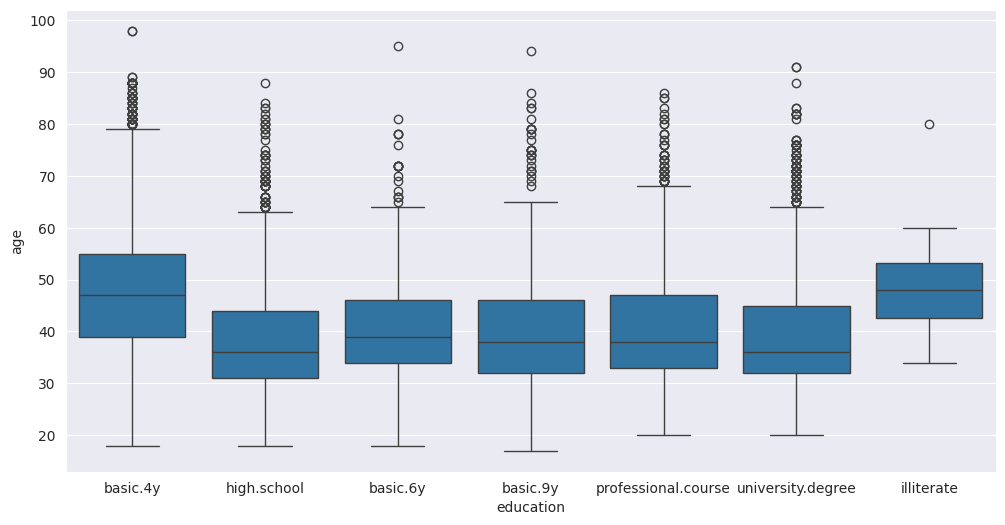

In [27]:
sns.boxplot(data=banks, x='education', y='age')
plt.gcf().set_size_inches(12,6)

In [28]:
df= banks[['age', 'education']]

In [29]:
df.groupby('education').mean()

,age
education,
basic.4y,47.561680
basic.6y,40.420053
basic.9y,39.047120
high.school,37.988377
illiterate,48.500000
professional.course,40.075981
university.degree,38.888558


In [30]:
100*banks.isnull().sum()/ len(banks)

age                0.000000
job                0.000000
marital            0.000000
education          3.913011
default           20.683061
housing            0.000000
loan               0.000000
contact            0.000000
month              0.000000
day_of_week        0.000000
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.000000
emp.var.rate       0.000000
cons.price.idx     0.000000
cons.conf.idx      0.000000
euribor3m          0.000000
nr.employed        0.000000
y                  0.000000
dtype: float64

<Axes: xlabel='default', ylabel='count'>

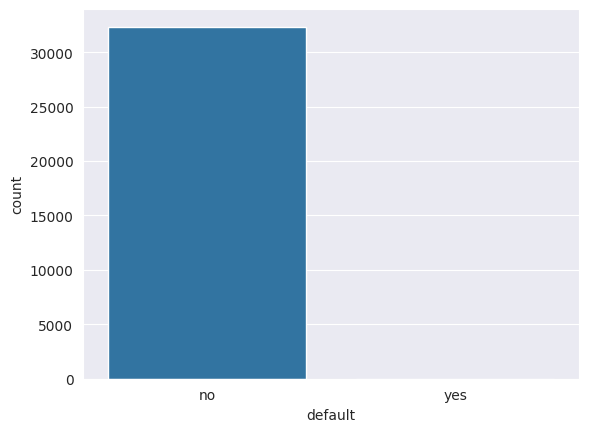

In [31]:
sns.countplot(x=banks['default'])

In [32]:
banks['default'].value_counts()

default
no     32348
yes        3
Name: count, dtype: int64

In [33]:
banks['default'].fillna(banks['default'].mode()[0], inplace=True)

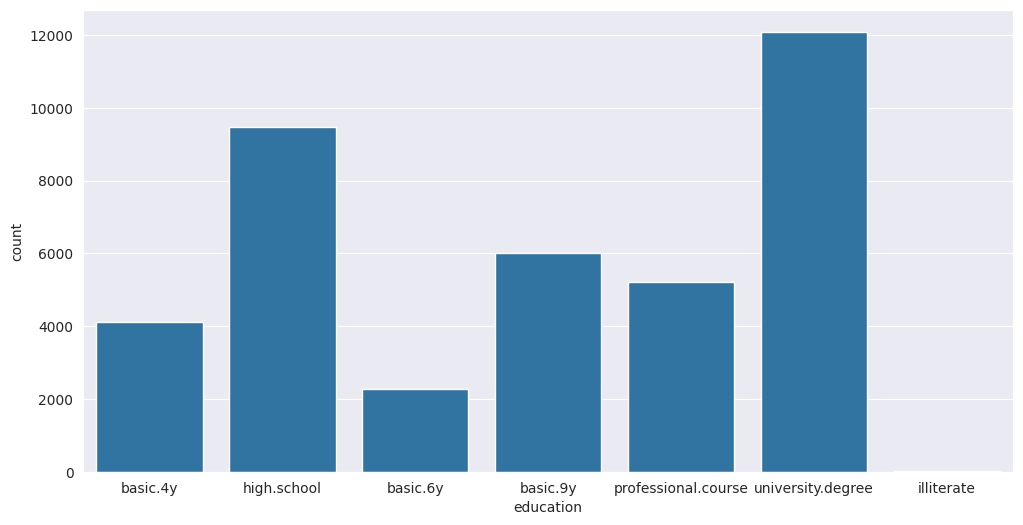

In [34]:
sns.countplot(x=banks['education'])
plt.gcf().set_size_inches(12,6)

In [35]:
banks['education'].value_counts(ascending=False)

education
university.degree      12096
high.school             9464
basic.9y                6006
professional.course     5225
basic.4y                4118
basic.6y                2264
illiterate                18
Name: count, dtype: int64

In [36]:
banks.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [37]:
df = banks[['job', 'education']]

In [38]:
pd.isna(banks['education'])

0        False
1        False
2        False
3        False
4        False
         ...  
41183    False
41184    False
41185    False
41186    False
41187    False
Name: education, Length: 40787, dtype: bool

In [39]:
df.groupby(by='job').describe()

education                                  
                  count unique                  top  freq
job                                                      
admin.            10159      7    university.degree  5741
blue-collar        8788      7             basic.9y  3620
entrepreneur       1396      7    university.degree   608
housemaid          1015      7             basic.4y   473
management         2798      6    university.degree  2061
retired            1617      7             basic.4y   595
self-employed      1387      7    university.degree   764
services           3814      6          high.school  2678
student             707      6          high.school   357
technician         6520      6  professional.course  3318
unemployed          990      6    university.degree   260

In [40]:
def fill_edu(job, education):
    if  pd.isna(education):
        if job == 'admin.':
            return 'university.degree'
        elif job == 'blue-collar':
            return 'basic.9y'
        elif job == 	'entrepreneur':
            return 'university.degree'
        elif job == 'housemaid':
            return 'basic.4y'
        elif job == 'management':
            return 'university.degree'
        elif job == 'retired':
            return 'basic.4y'
        elif job == 'self-employed':
            return 'university.degree'
        elif job == 'services':
            return 'high.school'
        elif job == 'student':
            return 'high.school'
        elif job == 'technician':
            return 'professional.course'
        elif job == 'unemployed':
            return 'university.degree'
        elif job == 'admin':
            return 'university.degree'
    else: return education
banks['education'] = banks.apply(lambda row: fill_edu(row['job'], row['education']), axis=1)

In [41]:
banks.select_dtypes(object).columns

Index(['job', 'marital', 'education', 'default', 'loan', 'contact', 'month',
       'day_of_week', 'poutcome'],
      dtype='object')

In [42]:
marital =pd.get_dummies(banks['marital'], dtype=int, drop_first=True)
banks =pd.concat([banks.drop('marital', axis=1), marital], axis=1)


In [43]:

banks['default']= pd.get_dummies(banks['default'],dtype=int, drop_first=True)

In [44]:
banks['loan'] =pd.get_dummies(banks['loan'], dtype=int, drop_first=True)

In [45]:
days=pd.get_dummies(banks['day_of_week'], dtype=int, drop_first=True)
banks = pd.concat([banks.drop('day_of_week', axis=1), days], axis=1)

In [46]:
month_contact=pd.get_dummies(banks[['month', 'contact']], dtype=int, drop_first=True)
banks=pd.concat([banks, month_contact], axis=1)

In [47]:
banks.drop(['month', 'contact'], axis=1, inplace=True)

In [48]:
edu=pd.get_dummies(banks['education'], dtype=int, drop_first=True)
banks = pd.concat([banks, edu], axis=1)

In [49]:
po =poutcome =pd.get_dummies(banks['poutcome'], dtype=int, drop_first=True, prefix='poutcome')
banks = pd.concat([banks, po], axis=1)
banks = banks.drop('poutcome', axis=1)

In [50]:
job =pd.get_dummies(banks['job'], dtype=int, drop_first=True, prefix='job')
banks = pd.concat([banks, job], axis=1)
banks = banks.drop('job', axis=1)

In [51]:
banks = banks.drop('education', axis=1)

In [52]:
banks.corr()['y'].sort_values(ascending=False)

y                       1.000000
poutcome_success        0.317898
previous                0.229090
month_mar               0.144433
month_oct               0.137481
month_sep               0.126201
job_student             0.094556
job_retired             0.092674
month_dec               0.079238
cons.conf.idx           0.054208
single                  0.053505
university.degree       0.051534
age                     0.030421
job_unemployed          0.015154
thu                     0.013774
housing                 0.011699
tue                     0.008640
illiterate              0.007284
wed                     0.005469
professional.course     0.001534
high.school             0.000807
job_management         -0.000302
default                -0.003056
loan                   -0.003982
job_self-employed      -0.004444
job_technician         -0.006297
job_housemaid          -0.006372
month_aug              -0.009121
month_jun              -0.009907
month_nov              -0.012225
job_entrep

In [53]:
df = banks.sample(frac=0.5,random_state=101)

In [54]:
X = df.drop(['y'],axis=1).values
y = df['y'].values

In [55]:
from imblearn.over_sampling import RandomOverSampler

In [75]:
ros = RandomOverSampler(sampling_strategy=0.6)
X_ros, y_ros = ros.fit_resample(X,y)

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ros,y_ros, random_state=101, train_size=0.3)

In [77]:
from sklearn.preprocessing import MinMaxScaler

In [78]:
mm = MinMaxScaler()

In [79]:
X_train = mm.fit_transform(X_train)

In [80]:
X_test = mm.transform(X_test)

In [81]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

<Axes: ylabel='count'>

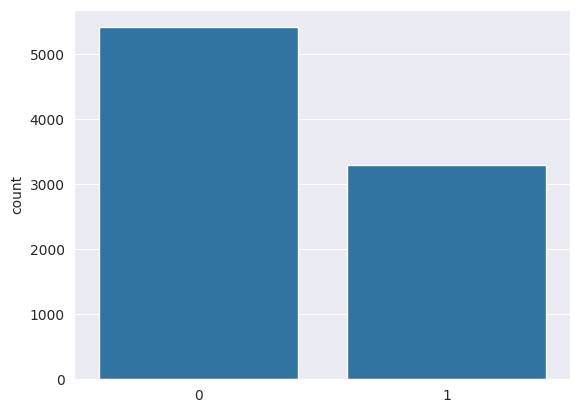

In [143]:
sns.countplot(x=y_train)

In [83]:
df.shape

(20394, 47)

In [126]:
from tensorflow.keras.optimizers import SGD,Adam

In [135]:
early_stop = EarlyStopping(patience=10, verbose=1, monitor='val_loss')
model = Sequential()
model.add(Dense(47, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(23, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(11, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam') 
model.fit(x=X_train, y=y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stop])


Epoch 1/100
272/272 [==============================] - 13s 20ms/step - loss: 0.5871 - val_loss: 0.5222
Epoch 2/100
272/272 [==============================] - 5s 17ms/step - loss: 0.5353 - val_loss: 0.5171
Epoch 3/100
272/272 [==============================] - 5s 18ms/step - loss: 0.5225 - val_loss: 0.5156
Epoch 4/100
272/272 [==============================] - 4s 16ms/step - loss: 0.5196 - val_loss: 0.5105
Epoch 5/100
272/272 [==============================] - 5s 17ms/step - loss: 0.5172 - val_loss: 0.5086
Epoch 6/100
272/272 [==============================] - 5s 17ms/step - loss: 0.5070 - val_loss: 0.5068
Epoch 7/100
272/272 [==============================] - 8s 29ms/step - loss: 0.5097 - val_loss: 0.5046
Epoch 8/100
272/272 [==============================] - 6s 23ms/step - loss: 0.5012 - val_loss: 0.5077
Epoch 9/100
272/272 [==============================] - 6s 20ms/step - loss: 0.4977 - val_loss: 0.5064
Epoch 10/100
272/272 [==============================] - 5s 17ms/step - loss: 0.49

In [136]:
p=pd.DataFrame(model.history.history)

<Axes: >

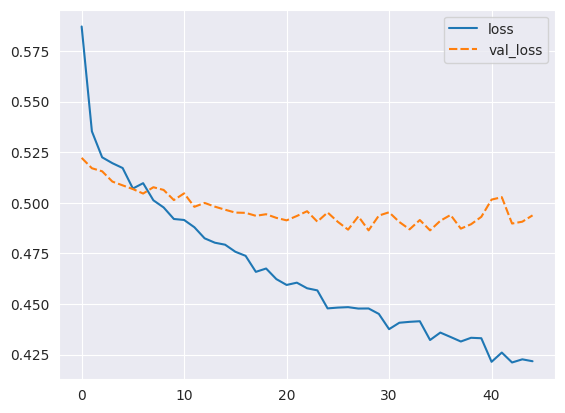

In [137]:
sns.lineplot(data=p)

In [138]:
from sklearn.metrics import classification_report,confusion_matrix

In [139]:
predictions = model.predict(X_test)


635/635 [==============================] - 3s 5ms/step


In [140]:
pred = (predictions > 0.5).astype(int)

In [141]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84     12722
           1       0.77      0.61      0.68      7586

    accuracy                           0.79     20308
   macro avg       0.78      0.75      0.76     20308
weighted avg       0.79      0.79      0.78     20308



In [142]:
confusion_matrix(y_test,pred)

array([[11367,  1355],
       [ 2947,  4639]])